Performance and results evaluation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Dataframe containing all strategies backtest

In [2]:
df = pd.read_excel('Results.xlsx')
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Strategy,Trading Weeks,Strategy Balance,N Weeks,Average Weekly Return,Annual Return,Standard Deviation,Final Return
0,"EMA_30 (0.9, 0.1) (0.2, 0.8) 3","[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...","[102.43896191861808, 108.01854395600319, 90.54...",125,0.374013,-0.292123,1.908628,46.751653
1,"EMA_12 (0.9, 0.1) (0.2, 0.8) 3","[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...","[93.8345046049814, 98.45687510193649, 95.38037...",129,0.348976,-0.261886,1.905094,45.017937
2,"EMA_30 (0.9, 0.1) (0.2, 0.8) 2","[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...","[103.03368617076329, 104.11619969754004, 85.55...",125,0.403251,-0.259447,2.011213,50.406372
3,"EMA_100 (0.9, 0.1) (0.2, 0.8) 3","[22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 3...","[105.96766760873862, 104.74952373087054, 106.5...",111,0.525686,-0.252470,1.725063,58.351165
4,"EMA_90 (0.9, 0.1) (0.2, 0.8) 3","[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","[98.5943717059664, 100.73839274647014, 100.527...",113,0.489874,-0.238836,1.714485,55.355771


Dataframes are imported from Excel so they need a few fixes

In [3]:
df = df.sort_values('Annual Return', ascending=False)

In [4]:
def adj_vec(arr):

    vettore = []

    for i in arr:
        sol = ""

        for j in i:
            if j.isdigit() or j in [".","-"]:
                sol += j
                
        vettore.append(float(sol))

    return vettore

sol = []

for i in range(len(df)):
    x = df["Trading Weeks"][i].split(",")
    sol.append(adj_vec(x))

df['Trading Weeks'] = sol

sol = []

for i in range(len(df)):
    x = df["Strategy Balance"][i].split(",")
    sol.append(adj_vec(x))

df['Strategy Balance'] = sol

fixed:

In [5]:
df.head()

,Strategy,Trading Weeks,Strategy Balance,N Weeks,Average Weekly Return,Annual Return,Standard Deviation,Final Return
287,"EMA_90 (0.1, 0.9) (1.0, 0.0) 1","[8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0,...","[102.43896191861808, 108.01854395600319, 90.54...",113,2.945197,0.635146,3.258977,332.807207
286,"EMA_30 (0.1, 0.9) (1.0, 0.0) 1","[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12....","[93.8345046049814, 98.45687510193649, 95.38037...",125,2.480503,0.618710,3.184512,310.062902
285,"EMA_100 (0.1, 0.9) (1.0, 0.0) 1","[8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0,...","[103.03368617076329, 104.11619969754004, 85.55...",111,2.611663,0.607053,3.240279,289.894553
284,"EMA_90 (0.2, 0.8) (0.9, 0.1) 1","[22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29....","[105.96766760873862, 104.74952373087054, 106.5...",113,2.512620,0.539747,2.842498,283.926044
283,"EMA_12 (0.1, 0.9) (1.0, 0.0) 1","[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[98.5943717059664, 100.73839274647014, 100.527...",129,2.350251,0.530309,3.198671,303.182415


creating a new measure that measures returns adjusted for their standard deviation

In [43]:
df['Adjusted Return for alpha^2'] = (df['Annual Return'] * 100) / df['Standard Deviation']

ranking strategies basing on their performance, adjusted for standard deviation

In [45]:
df['Rank'] = round(df["Adjusted Return for alpha^2"].rank(pct=True, method='max') * 100,0)

df.head()

,Strategy,Trading Weeks,Strategy Balance,N Weeks,Average Weekly Return,Annual Return,Standard Deviation,Final Return,Rank,Adjusted Return for alpha^2
282,"EMA_90 (0.1, 0.9) (1.0, 0.0) 2","[8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0,...","[102.80608770957404, 102.25961135841065, 80.32...",113,2.530068,0.524591,2.347299,285.897723,100.0,22.348714
279,"EMA_30 (0.1, 0.9) (1.0, 0.0) 2","[8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0,...","[101.68106879525739, 106.60676835566343, 91.24...",125,2.283736,0.507124,2.273990,285.466942,100.0,22.301074
271,"EMA_30 (0.1, 0.9) (1.0, 0.0) 3","[8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0,...","[102.15777781340731, 103.15269197892032, 86.62...",125,1.982177,0.435213,1.991481,247.772134,99.0,21.853753
278,"EMA_100 (0.1, 0.9) (1.0, 0.0) 2","[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12....","[93.82090063104627, 98.00657010048887, 95.8259...",111,2.308599,0.504130,2.318407,256.254492,99.0,21.744695
272,"EMA_90 (0.2, 0.8) (0.9, 0.1) 2","[22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29....","[105.08529831371187, 104.00650185739076, 106.1...",113,2.141752,0.437503,2.027095,242.017924,99.0,21.582777


plotting all strategies

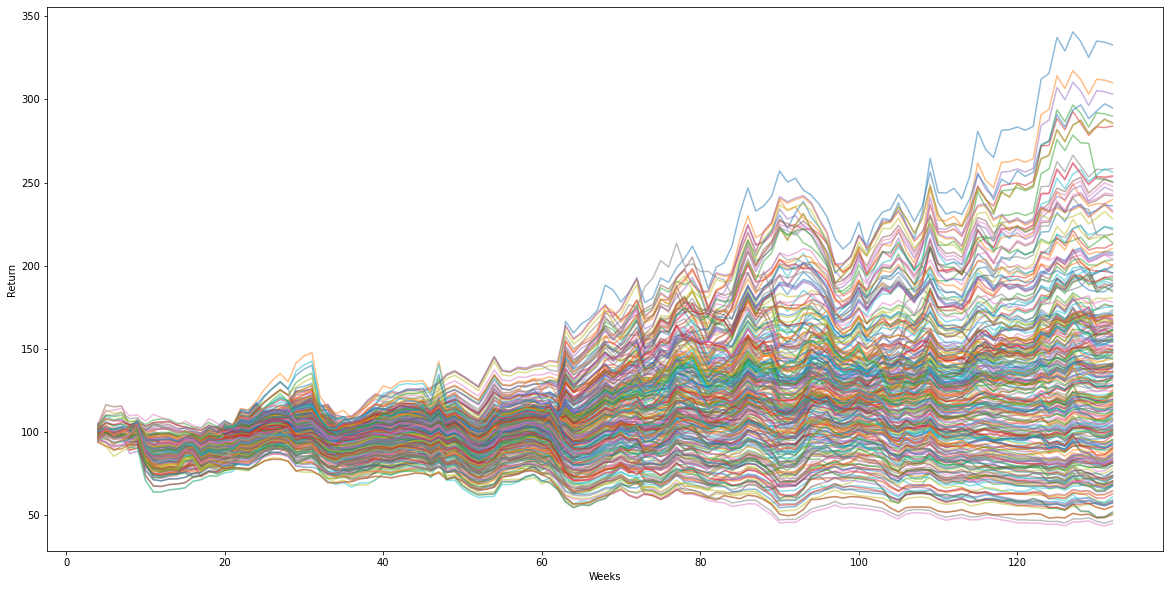

In [90]:
plt.figure(figsize=(20, 10))

for i in range(len(df)):
    plt.plot(df['Trading Weeks'][i], df['Strategy Balance'][i], alpha=0.50)

plt.xlabel('Weeks')
plt.ylabel('Return')

plt.show()

plotting top 10 strategies, basing only on returns

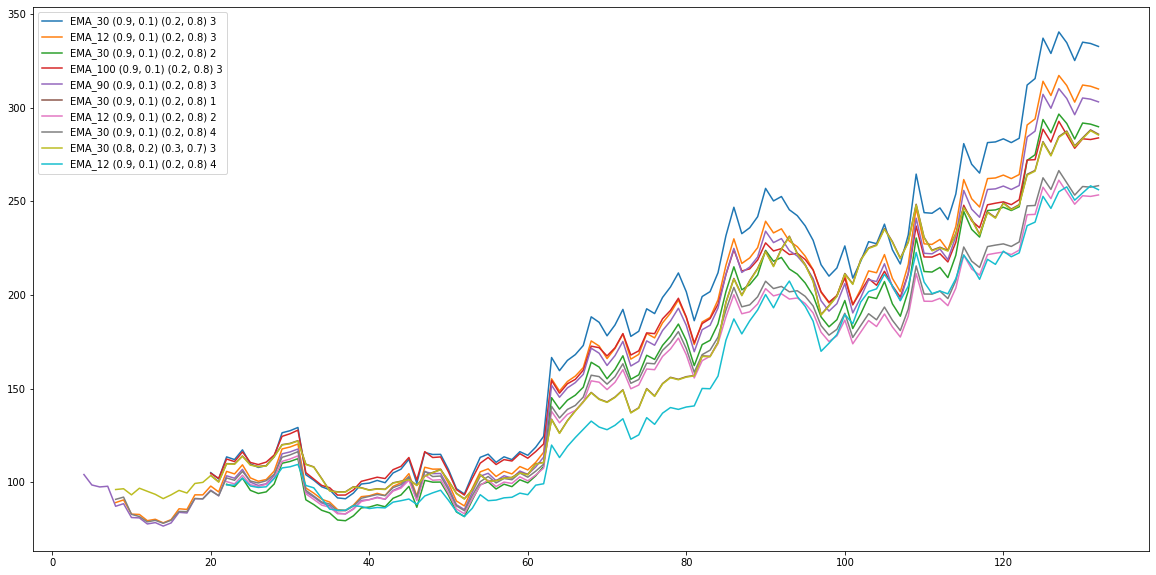

In [46]:
plt.figure(figsize=(20, 10))

for i in range(len(df.head(10))):
    plt.plot(df["Trading Weeks"][i],df['Strategy Balance'][i], label=df['Strategy'][i])

plt.legend()

plt.show()

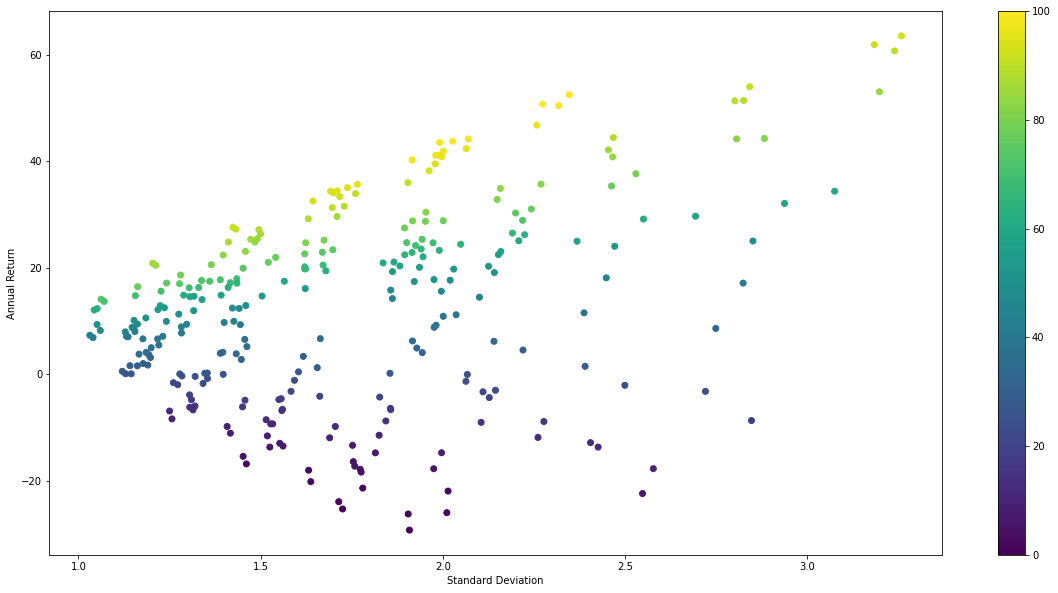

In [47]:
plt.figure(figsize=(20, 10))

plt.scatter(df["Standard Deviation"], df['Annual Return']*100, c=df['Rank'])
plt.xlabel("Standard Deviation")
plt.ylabel("Annual Return")
plt.colorbar()

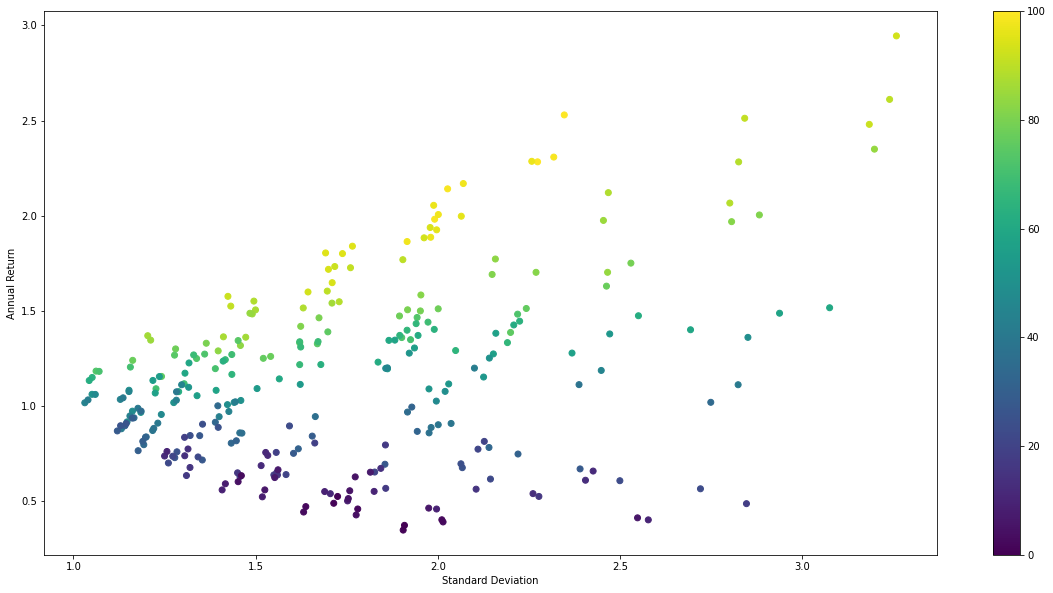

In [91]:
plt.figure(figsize=(20, 10))

plt.scatter(df["Standard Deviation"], df['Average Weekly Return'], c=df['Rank'])
plt.xlabel("Standard Deviation")
plt.ylabel("Annual Return")
plt.colorbar()

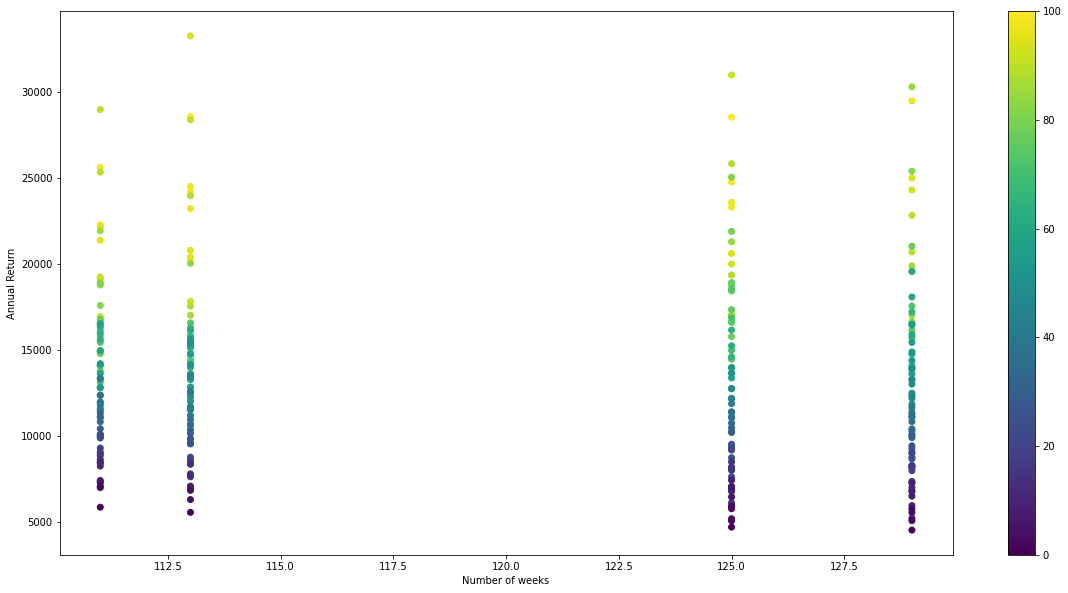

In [48]:
plt.figure(figsize=(20, 10))

plt.scatter(df["N Weeks"], df['Final Return']*100, c=df['Rank'])
plt.xlabel("Number of weeks")
plt.ylabel("Annual Return")
plt.colorbar()

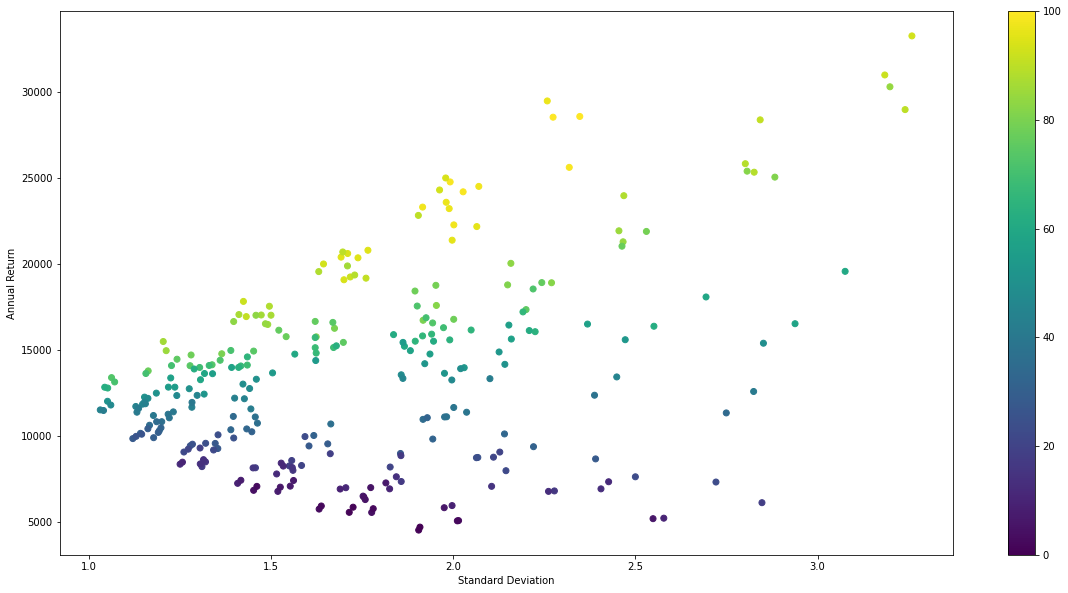

In [49]:
plt.figure(figsize=(20, 10))

plt.scatter(df["Standard Deviation"], df['Final Return']*100, c=df['Rank'])
plt.xlabel("Standard Deviation")
plt.ylabel("Annual Return")
plt.colorbar()

In [50]:
df.head()

,Strategy,Trading Weeks,Strategy Balance,N Weeks,Average Weekly Return,Annual Return,Standard Deviation,Final Return,Rank,Adjusted Return for alpha^2
282,"EMA_90 (0.1, 0.9) (1.0, 0.0) 2","[8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0,...","[102.80608770957404, 102.25961135841065, 80.32...",113,2.530068,0.524591,2.347299,285.897723,100.0,22.348714
279,"EMA_30 (0.1, 0.9) (1.0, 0.0) 2","[8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0,...","[101.68106879525739, 106.60676835566343, 91.24...",125,2.283736,0.507124,2.273990,285.466942,100.0,22.301074
271,"EMA_30 (0.1, 0.9) (1.0, 0.0) 3","[8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0,...","[102.15777781340731, 103.15269197892032, 86.62...",125,1.982177,0.435213,1.991481,247.772134,99.0,21.853753
278,"EMA_100 (0.1, 0.9) (1.0, 0.0) 2","[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12....","[93.82090063104627, 98.00657010048887, 95.8259...",111,2.308599,0.504130,2.318407,256.254492,99.0,21.744695
272,"EMA_90 (0.2, 0.8) (0.9, 0.1) 2","[22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29....","[105.08529831371187, 104.00650185739076, 106.1...",113,2.141752,0.437503,2.027095,242.017924,99.0,21.582777


In [51]:
df.sort_values('Adjusted Return for alpha^2', ascending=False, inplace=True)

now i am plotting the top 10 strategies basing on returns adjusted for their standard deviation

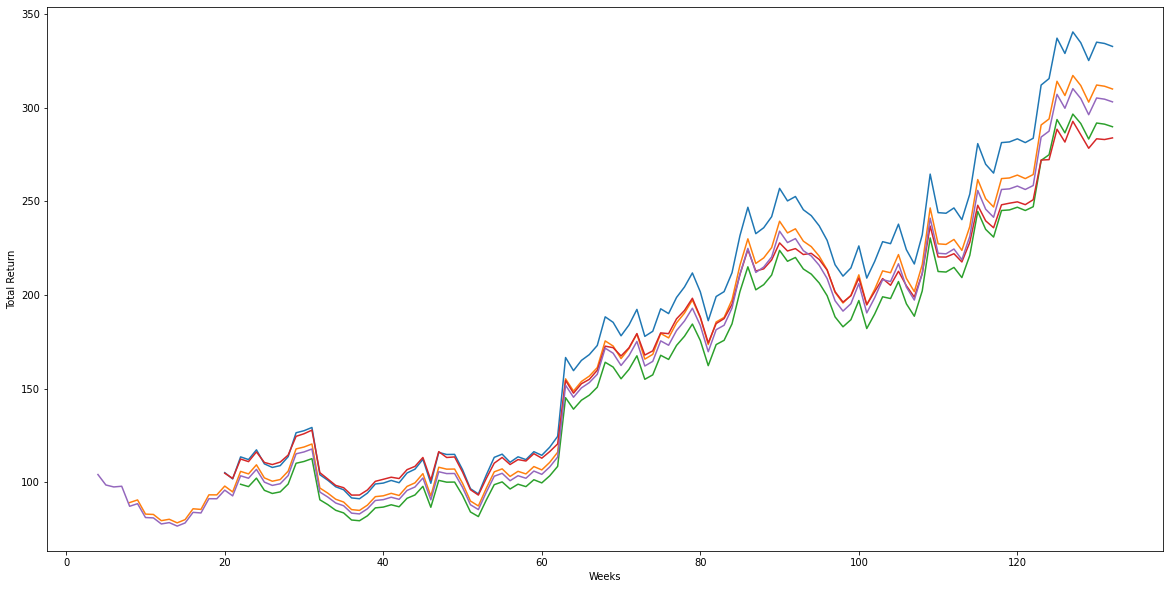

In [62]:
plt.figure(figsize=(20, 10))

plt.xlabel("Weeks")
plt.ylabel("Total Return")

for i in range(len(df.head(5))):
    plt.plot(df["Trading Weeks"][i],df['Strategy Balance'][i], label=df['Strategy'][i])

In [101]:
df_sorted_for_sd = df.sort_values('Adjusted Return for alpha^2', ascending=True).head(5).reset_index(drop=True)
df_sorted_for_return = df.sort_values('Average Weekly Return', ascending=True).head(5).reset_index(drop=True)

now i am comparing 
* top 5 strategies basing exclusively on returns, they are plotted in red
* top 5 strategies basing on returns adjusted for their standard deviation, they are plotted in blue

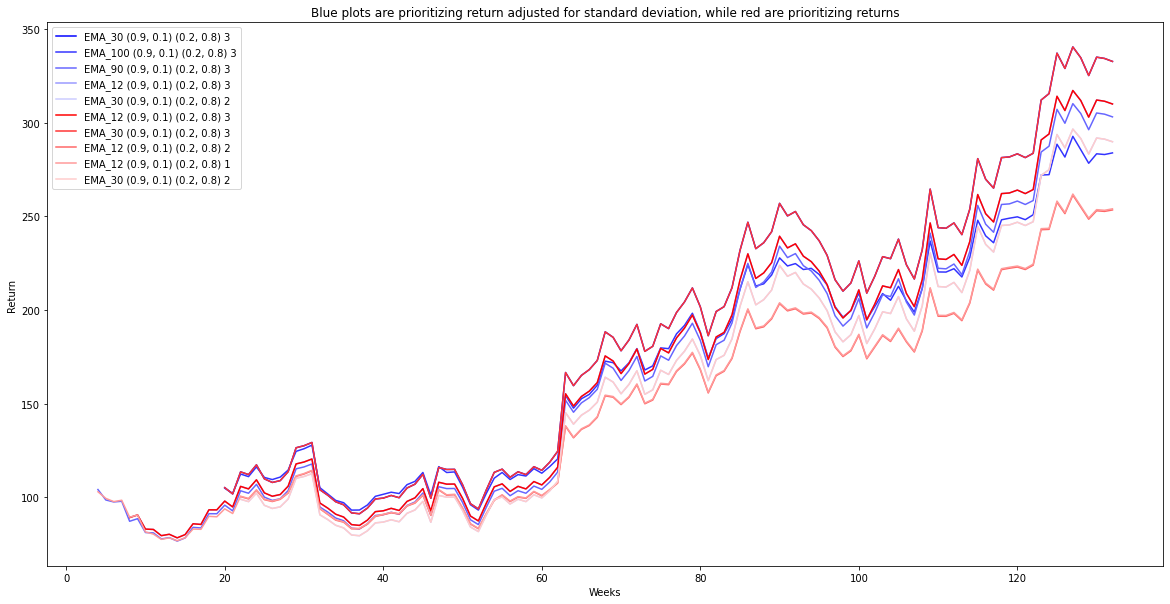

In [102]:
plt.figure(figsize=(20, 10))

plt.xlabel("Weeks")
plt.ylabel("Return")
plt.title('Blue plots are prioritizing return adjusted for standard deviation, while red are prioritizing returns')

colors_hex_1= ["#0000FF", "#3333FF", "#6666FF", "#9999FF", "#CCCCFF", "#6666FF", "#3333FF", "#0000FF", "#0000CC", "#000099"]
color_hex_2 = ["#FF0000", "#FF3333", "#FF6666", "#FF9999", "#FFCCCC", "#FF6666", "#FF3333", "#FF0000", "#CC0000", "#990000"]

for i in range(len(df_sorted_for_sd)):
    plt.plot(df_sorted_for_sd["Trading Weeks"][i],df_sorted_for_sd['Strategy Balance'][i], label=df_sorted_for_sd["Strategy"][i], color=colors_hex_1[i])

for i in range(len(df_sorted_for_return)):
    plt.plot(df_sorted_for_return["Trading Weeks"][i],df_sorted_for_return['Strategy Balance'][i], label=df_sorted_for_return["Strategy"][i], color=color_hex_2[i])

plt.legend()
plt.show()

Now it's the same graph as before, but i am plotting only the top 2

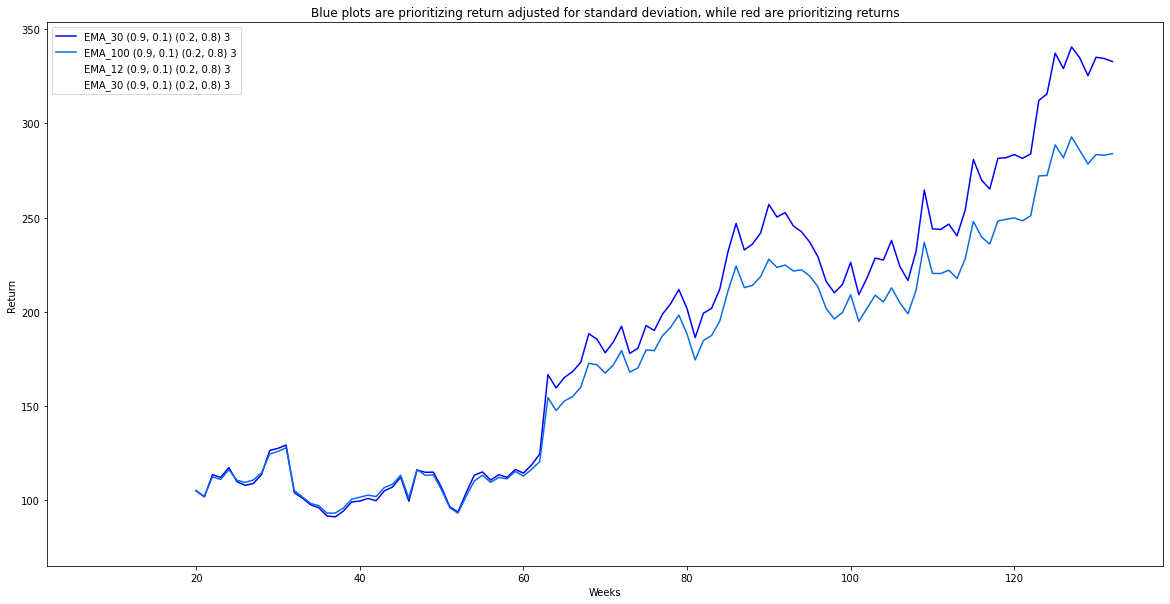

In [103]:
plt.figure(figsize=(20, 10))

plt.xlabel("Weeks")
plt.ylabel("Return")
plt.title('Blue plots are prioritizing return adjusted for standard deviation, while red are prioritizing returns')

colors_hex_1= ["#0000FF", "#096be3"]
color_hex_2 = ["#FF0000", "#660517"]

for i in range(len(df_sorted_for_sd.tail(2))):
    plt.plot(df_sorted_for_sd["Trading Weeks"][i],df_sorted_for_sd['Strategy Balance'][i], label=df_sorted_for_sd["Strategy"][i], color=colors_hex_1[i], alpha=1.00)

for i in range(len(df_sorted_for_return.tail(2))):
    plt.plot(df_sorted_for_return["Trading Weeks"][i],df_sorted_for_return['Strategy Balance'][i], label=df_sorted_for_return["Strategy"][i], color=color_hex_2[i], alpha=0)

plt.legend()
plt.show()

The winner is: EMA 30(0.9, 01)(0.2, 0.8)3